# Acoustic source localization using Bayesian optimization and a Gaussian process surrogate model

In [1]:
import ast
from pathlib import Path
import sys

print(Path.cwd().parents[0])
sys.path.insert(0, Path.cwd().parents[0].resolve().as_posix())

from ax.utils.notebook.plotting import init_notebook_plotting, render
from ax.service.ax_client import AxClient
from IPython.display import Video
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import loadmat
import seaborn as sns

from oao.utilities import load_config
from BOGP import collate

init_notebook_plotting()

ROOT = Path.home() / "Research" / "Projects" / "BOGP"
FIGURE_PATH = ROOT / "Reports" / "JASA" / "figures"
SAVEFIG_KWARGS = {"dpi": 200, "facecolor": "white", "bbox_inches": "tight"}
AMBSURF_PATH = ROOT / "Data" / "SWELLEX96" / "VLA" / "selected" / "multifreq" / "148.0-166.0-201.0-235.0-283.0-338.0-388.0"

/Users/williamjenkins/Research/Projects/BOGP


## 1. Bayesian Optimization in Action

### 1-D Case: Range Estimation

### 2-D Case: Localization

## 2. Simulations

### Range Estimation

Read in simulation results and format the data frame.

In [2]:
sim_dir = ROOT / "Data" / "range_estimation" / "simulation"
serial = "serial_230217"
df = pd.read_csv(sim_dir / serial / "results" / "collated.csv")

Plot optimization history and range estimation error.

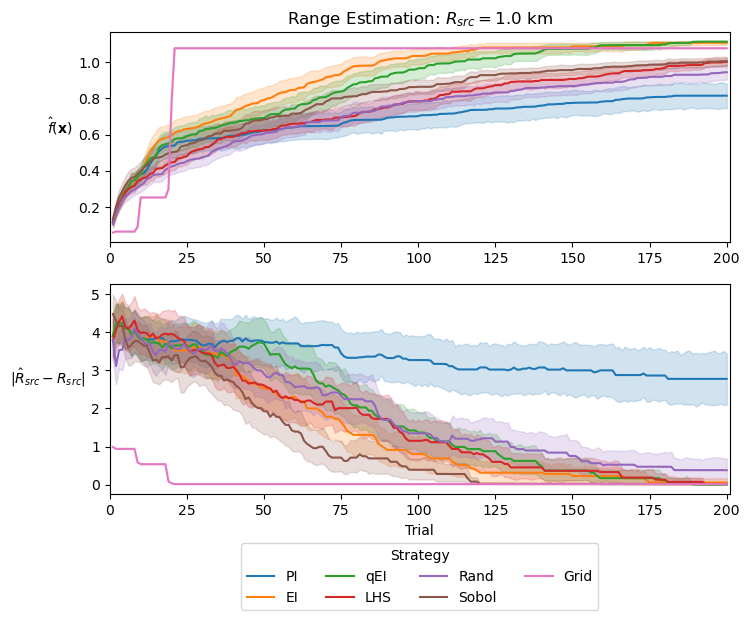

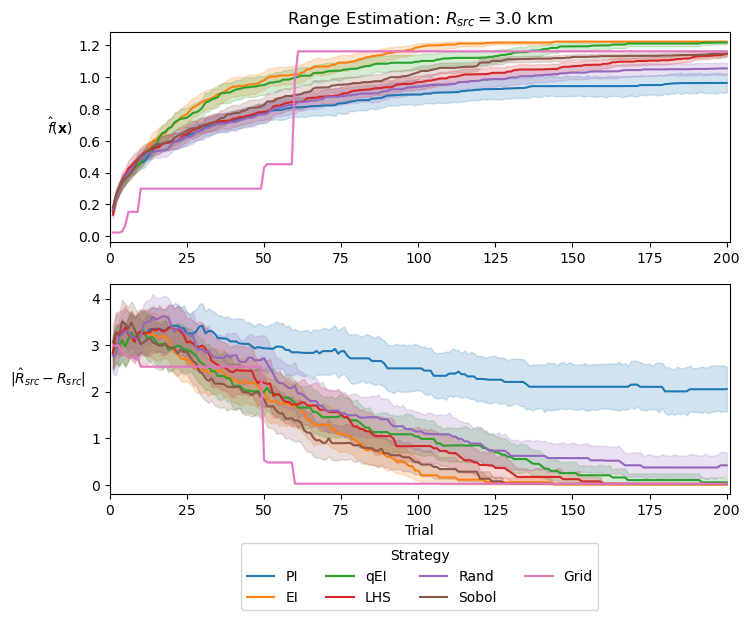

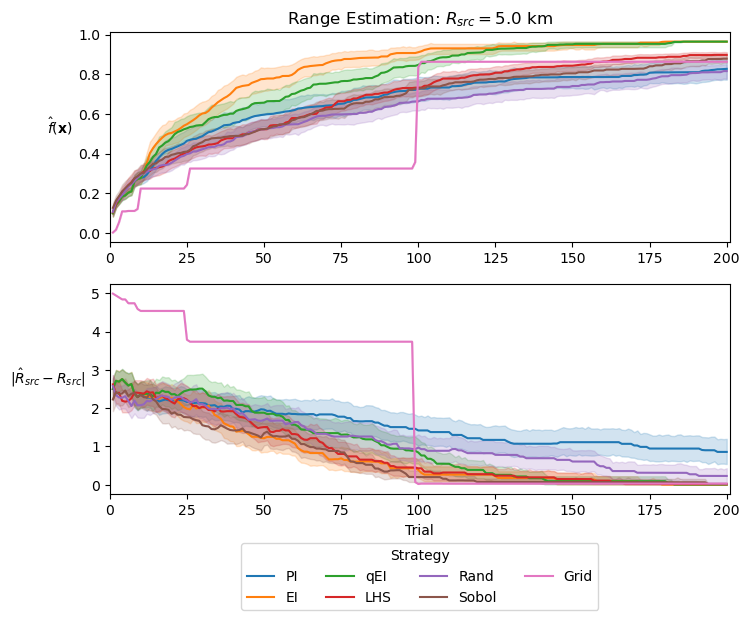

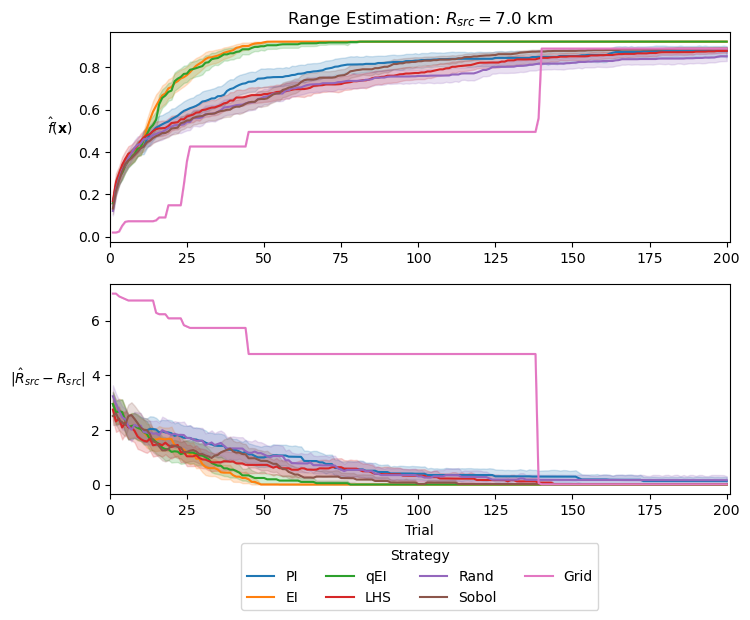

In [3]:
for r in sorted(df["range"].unique()):
    selection = df["range"] == r

    fig, axs = plt.subplots(figsize=(8, 6), nrows=2)

    ax = axs[0]
    sns.lineplot(
        data=df[selection],
        x="trial_index",
        y="best_values",
        hue="strategy",
        ax=ax,
        legend=None,
    )
    ax.set_xlim([0, 201])
    ax.set_xlabel(None)
    ax.set_ylabel("$\hat{f}(\mathbf{x})$", rotation=0, ha="right")
    ax.set_title(f"Range Estimation: $R_{{src}} = {r}$ km")

    ax = axs[1]
    sns.lineplot(
        data=df[selection], x="trial_index", y="best_range_error", hue="strategy", ax=ax
    )
    ax.set_xlim([0, 201])
    sns.move_legend(
        ax, "upper center", bbox_to_anchor=(0.5, -0.2), ncol=4, title="Strategy"
    )
    ax.set_xlabel("Trial")
    ax.set_ylabel("$\\vert \hat{R}_{src}- R_{src} \\vert$", rotation=0, ha="right")
    ax.set_title(None)

    fig.savefig(
        FIGURE_PATH.parents[1] / "Figures" / f"perf_hist_rs_{r}km.png", **SAVEFIG_KWARGS
    )
    plt.show()

### Localization

Read in simulation results and format the data frame.

In [ ]:
sim_dir = ROOT / "Data" / "localization" / "simulation"
serial = "serial_230218"
df = pd.read_csv(sim_dir / serial / "results" / "collated.csv")

Plot optimization history and range/depth estimation error.

In [ ]:
for r in sorted(df["range"].unique()):
    selection = df["range"] == r

    fig, axs = plt.subplots(figsize=(8, 9), nrows=3)

    ax = axs[0]
    sns.lineplot(
        data=df[selection],
        x="trial_index",
        y="best_values",
        hue="strategy",
        ax=ax,
        legend=None,
    )
    ax.set_xlim([0, 201])
    ax.set_xlabel(None)
    ax.set_ylabel("$\hat{f}(\mathbf{x})$", rotation=0, ha="right")
    ax.set_title(f"Range Estimation: $R_{{src}} = {r}$ km")

    ax = axs[1]
    sns.lineplot(
        data=df[selection],
        x="trial_index",
        y="best_range_error",
        hue="strategy",
        ax=ax,
        legend=None,
    )
    ax.set_xlim([0, 201])
    ax.set_xlabel(None)
    ax.set_ylabel("$\\vert \hat{R}_{src}- R_{src} \\vert$", rotation=0, ha="right")
    ax.set_title(None)

    ax = axs[2]
    sns.lineplot(
        data=df[selection], x="trial_index", y="best_depth_error", hue="strategy", ax=ax
    )
    ax.set_xlim([0, 201])
    sns.move_legend(
        ax, "upper center", bbox_to_anchor=(0.5, -0.2), ncol=4, title="Strategy"
    )
    ax.set_xlabel("Trial")
    ax.set_ylabel("$\\vert \hat{R}_{src}- R_{src} \\vert$", rotation=0, ha="right")
    ax.set_title(None)

    fig.savefig(
        FIGURE_PATH.parents[1] / "Figures" / f"perf_hist_ls_{r}km.png", **SAVEFIG_KWARGS
    )
    plt.show()

## 3. Experimental Data: SWellEx-96

Load experimental data results. Multi-frequency MFP at high resolution (500 range bins, 100 depth bins) provides the baseline against which to compare optimization strategies.

In [2]:
no_data = [
    list(range(73, 85)),
    list(range(95, 103)),
    list(range(187, 199)),
    list(range(287, 294)),
    list(range(302, 309))
]

SKIP_T = (
    [49, 72, 94, 186, 286, 301]
    + no_data[0]
    + no_data[1]
    + no_data[2]
    + no_data[3]
    + no_data[4]
)

XLIM = [0, 350]
NO_DATA_KW = {
    "color": "black",
    "alpha": 0.25,
    "linewidth": 0,
    "label": None
}

# Load high-res MFP
timesteps, ranges, depths = collate.load_mfp_results(AMBSURF_PATH)

# GPS Range
gps_fname = ROOT / "Data" / "SWELLEX96" / "VLA" / "selected" / "gps_range.csv"
df_gps = pd.read_csv(gps_fname, index_col=0)

serial = "serial_constrained_50-75"
fname = ROOT / "Data" / "localization" / "experimental" / serial / "results" / "collated.csv"
df = pd.read_csv(fname, index_col=0)
df

optimization          mode                    serial  Time Step  \
0     localization  experimental  serial_constrained_50-75         32   
1     localization  experimental  serial_constrained_50-75         32   
2     localization  experimental  serial_constrained_50-75         32   
3     localization  experimental  serial_constrained_50-75         32   
4     localization  experimental  serial_constrained_50-75         32   
...            ...           ...                       ...        ...   
2676           NaN           NaN                       NaN        345   
2677           NaN           NaN                       NaN        346   
2678           NaN           NaN                       NaN        347   
2679           NaN           NaN                       NaN        348   
2680           NaN           NaN                       NaN        349   

          strategy         seed  bartlett  trial_index arm_name     rec_r  \
0               PI  292288111.0  0.387969        163.0    162_0  7.595025   
1               EI  292288111.0  0.387964         83.0     82_0  7.595210   
2              qEI  292288111.0  0.387969         69.0     68_0  7.595070   
3              LHS  292288111.0  0.346465         24.0     23_0  7.555657   
4             Rand  292288111.0  0.349084         73.0     72_0  7.589048   
...            ...          ...       ...          ...      ...       ...   
2676  High-res MFP          NaN       NaN          NaN      NaN  1.511503   
2677  High-res MFP          NaN       NaN          NaN      NaN  1.531523   
2678  High-res MFP          NaN       NaN          NaN      NaN  1.551543   
2679  High-res MFP          NaN       NaN          NaN      NaN  1.571563   
2680  High-res MFP          NaN       NaN          NaN      NaN  1.591583   

          src_z trial_status generation_method  
0     53.374863    COMPLETED           BoTorch  
1     53.395019    COMPLETED           BoTorch  
2     53.372913    COMPLETED           BoTorch  
3     54.306255    COMPLETED            Manual  
4     56.152953    COMPLETED            Manual  
...         ...          ...               ...  
2676  69.343434          NaN               NaN  
2677  69.343434          NaN               NaN  
2678  67.333333          NaN               NaN  
2679  67.333333          NaN               NaN  
2680  69.343434          NaN               NaN  

[2681 rows x 13 columns]

### Localization with constrained depth

Array tilt and a sloped bottom cause mismatch between the true and modeled environments, leading to source depth shifting deeper as the source approaches CPA. To permit the optimization strategies to obtain more accurate range estimations, source depth is allowed to be searched within a narrow range rather than remaining fixed.

#### Range estimation

Strategy       MAE
8  High-res MFP  0.000000
2           qEI  0.470780
1            EI  0.482495
3           LHS  0.654707
4          Rand  0.702964
5         Sobol  0.730713
7           SBL  0.783758
6          Grid  0.903768
0            PI  0.947128

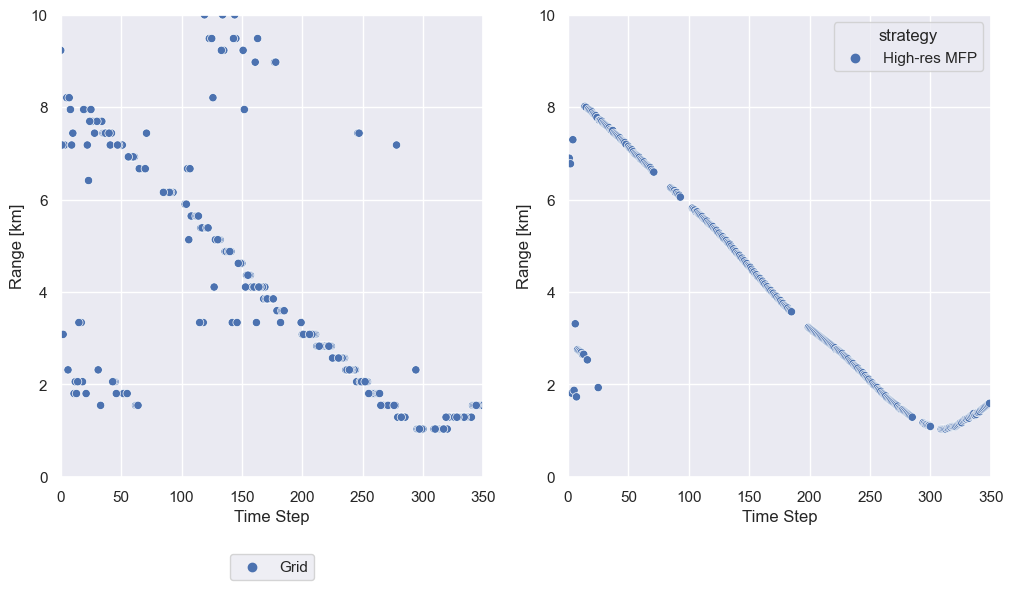

In [101]:
sns.set_theme(style="darkgrid")
# import matplotlib.pyplot as plt

zvec = np.linspace(1, 200, 100)
rvec = np.linspace(10e-3, 10, 500)
zind = np.argmin(np.abs(zvec - 60))

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
ax = axs[0]
sns.scatterplot(
    data=df[df["strategy"] == "Grid"], x="Time Step", y="rec_r", hue="strategy", ax=ax
)
# sns.scatterplot(data=df, x="Time Step", y="rec_r", hue="strategy", ax=ax)
ax.set_ylabel("Range [km]")
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncols=4)
ax.set_xlim([0, 350])
ax.set_ylim([0, 10])

ax = axs[1]
sns.scatterplot(
    data=df[df["strategy"] == "High-res MFP"], x="Time Step", y="rec_r", hue="strategy", ax=ax
)
ax.set_xlabel("Time Step")
ax.set_ylabel("Range [km]")
ax.set_xlim([0, 350])
ax.set_ylim([0, 10])

errors = []
for strategy in df["strategy"].unique():
    error, _ = get_error(df[df["strategy"] == strategy], "rec_r", timesteps, ranges)
    MAE = np.mean(np.abs(error))
    errors.append({"Strategy": strategy, "MAE": MAE})

error_df = pd.DataFrame.from_dict(errors).sort_values("MAE")
error_df

#### Depth estimation

Strategy       MAE
8  High-res MFP  0.000000
2           qEI  2.569960
1            EI  2.777438
0            PI  3.536306
5         Sobol  4.100809
3           LHS  4.433982
6          Grid  5.418099
4          Rand  5.806024
7           SBL  7.247839

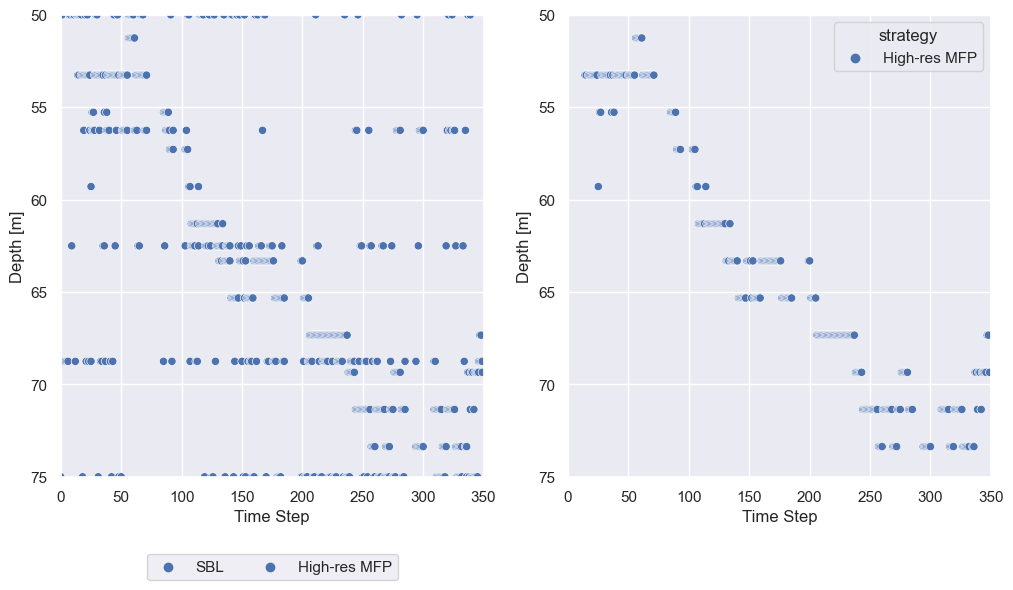

In [138]:
sns.set_theme(style="darkgrid")
# import matplotlib.pyplot as plt

zvec = np.linspace(1, 200, 100)
rvec = np.linspace(10e-3, 10, 500)
# zind = np.argmin(np.abs(zvec - 60))

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
ax = axs[0]
sns.scatterplot(
    data=df[df["strategy"] == "SBL"], x="Time Step", y="src_z", hue="strategy", ax=ax
)
# sns.scatterplot(data=df, x="Time Step", y="src_z", hue="strategy", ax=ax)
ax.set_ylabel("Depth [m]")
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncols=4)
ax.set_xlim([0, 350])
ax.set_ylim([75, 50])

ax = axs[1]
sns.scatterplot(
    data=df[df["strategy"] == "High-res MFP"], x="Time Step", y="src_z", hue="strategy", ax=ax
)
ax.set_xlabel("Time Step")
ax.set_ylabel("Depth [m]")
ax.set_xlim([0, 350])
ax.set_ylim([75, 50])

errors = []
for strategy in df["strategy"].unique():
    error, _ = get_error(df[df["strategy"] == strategy], "src_z", timesteps, depths)
    MAE = np.mean(np.abs(error))
    errors.append({"Strategy": strategy, "MAE": MAE})

error_df = pd.DataFrame.from_dict(errors).sort_values("MAE")
error_df

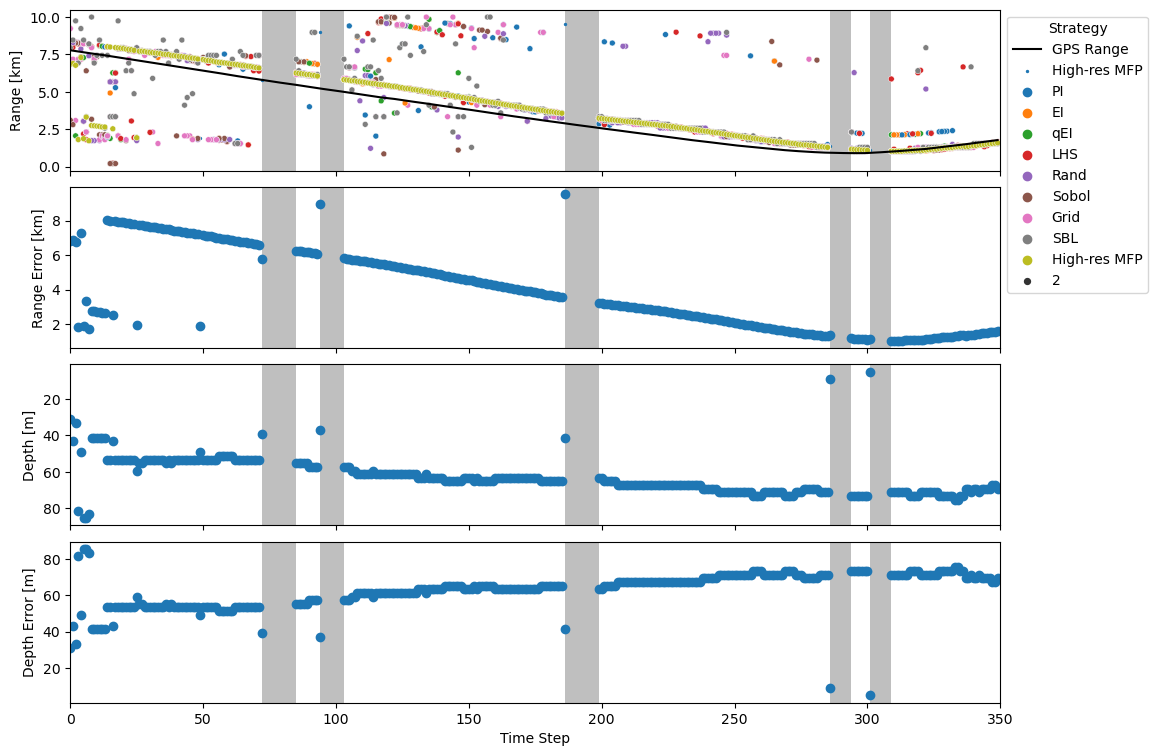

In [9]:
fig, axs = plt.subplots(figsize=(12, 9), nrows=4, gridspec_kw={"hspace": 0.1})

ax = axs[0]
sns.lineplot(data=df_gps, x=df_gps.index, y="Range [km]", color="k", label="GPS Range", ax=ax)
ax.scatter(timesteps, ranges, s=2, label="High-res MFP")
sns.scatterplot(data=df, x="Time Step", y="rec_r", hue="strategy", size=2, ax=ax)
[ax.axvspan(l[0] - 1, l[-1] + 1, zorder=-10, **NO_DATA_KW) for l in no_data]
ax.set_xticklabels([])
ax.set_xlim(XLIM)
ax.set_xlabel(None)
ax.set_ylabel("Range [km]")
sns.move_legend(
    ax, "upper left", bbox_to_anchor=(1.0, 1.0), title="Strategy"
)

ax = axs[1]
ax.scatter(timesteps, ranges)

[ax.axvspan(l[0] - 1, l[-1] + 1, zorder=-10, **NO_DATA_KW) for l in no_data]
ax.set_xticklabels([])
ax.set_xlim(XLIM)
ax.set_xlabel(None)
ax.set_ylabel("Range Error [km]")

ax = axs[2]
ax.scatter(timesteps, depths)
ax.invert_yaxis()

[ax.axvspan(l[0] - 1, l[-1] + 1, zorder=-10, **NO_DATA_KW) for l in no_data]
ax.set_xticklabels([])
ax.set_xlim(XLIM)
ax.set_xlabel(None)
ax.set_ylabel("Depth [m]")

ax = axs[3]
ax.scatter(timesteps, depths)

[ax.axvspan(l[0] - 1, l[-1] + 1, zorder=-10, **NO_DATA_KW) for l in no_data]
ax.set_xlim(XLIM)
ax.set_xlabel("Time Step")
ax.set_ylabel("Depth Error [m]")

plt.show()

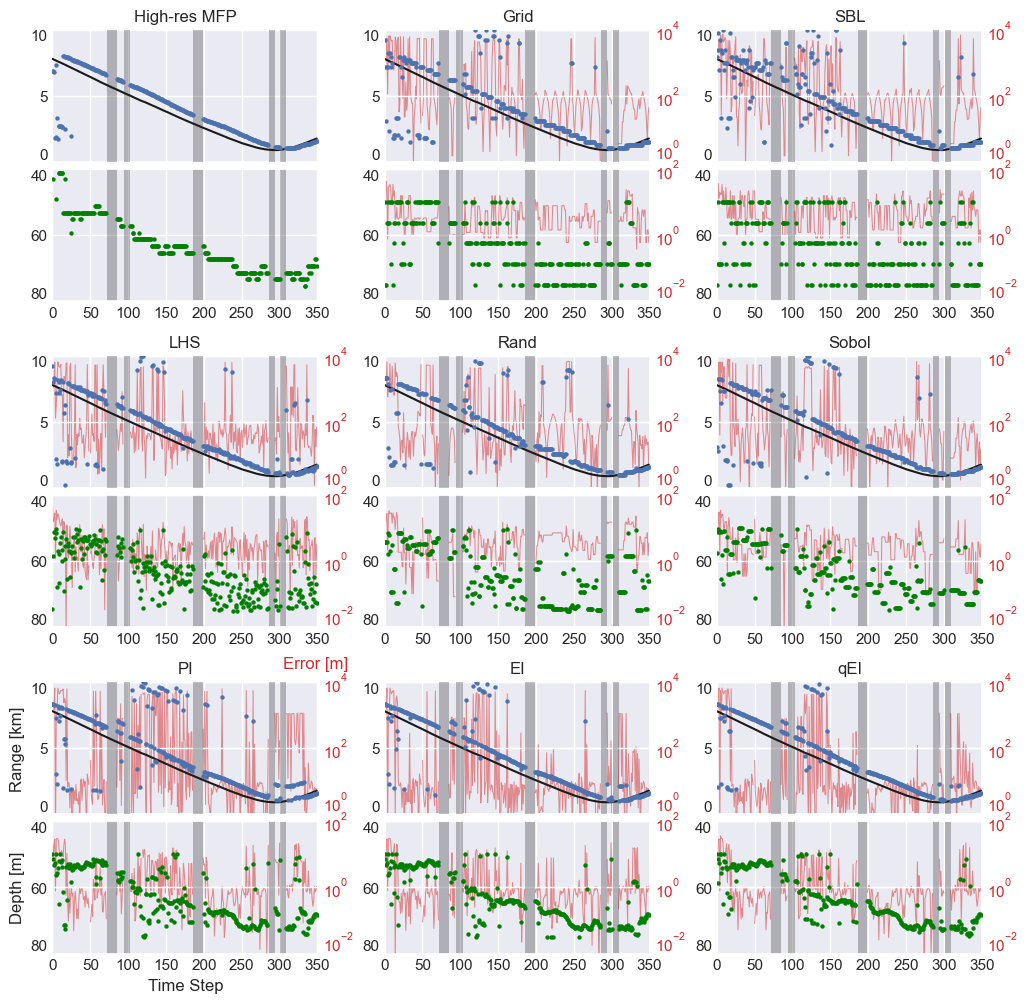

In [3]:
from BOGP.figures import plot_experimental_results

fig = plot_experimental_results(df, df_gps, timesteps, ranges, depths)
plt.show()

### Full localization

Load experimental data results.

In [ ]:
serial = "serial_full_depth"
df = pd.read_csv(
    ROOT / "Data" / "localization" / "experimental" / serial / "results" / "best_results.csv"
)
df["scenario"] = (
    df["scenario"]
    .apply(lambda x: ast.literal_eval(x))
    .apply(lambda x: list(x.values())[0])
)
df = df.rename(columns={"scenario": "Time Step"})
print(df["strategy"].unique())

#### Range estimation

In [ ]:
sns.set_theme(style="darkgrid")
# import matplotlib.pyplot as plt

zvec = np.linspace(1, 200, 100)
rvec = np.linspace(10e-3, 10, 500)
zind = np.argmin(np.abs(zvec - 60))

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
ax = axs[0]
sns.scatterplot(
    data=df[df["strategy"] == "grid"], x="Time Step", y="rec_r", hue="strategy", ax=ax
)
# sns.scatterplot(data=df, x="Time Step", y="rec_r", hue="strategy", ax=ax)
ax.set_ylabel("Range [km]")
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncols=4)
ax.set_xlim([0, 350])
ax.set_ylim([0, 10])

timesteps = []
ranges = []
for t in range(350):
    try:
        surf = np.load(AMBSURF_PATH / f"ambsurf_mf_t={t + 1:03d}.npy")
        # zslice = surf[zind]
        # rind = np.argmax(zslice)
        inds = np.unravel_index(surf.argmax(), surf.shape)
        # ranges.append(rvec[rind])

        # depths.append(zvec[inds[0]])
        ranges.append(rvec[inds[1]])
        timesteps.append(t)
    except FileNotFoundError:
        continue

ax = axs[1]
ax.scatter(timesteps, ranges)
ax.set_xlabel("Time Step")
ax.set_ylabel("Range [km]")
ax.set_xlim([0, 350])
ax.set_ylim([0, 10])


timesteps = np.array(timesteps)
ranges = np.array(ranges)
errors = []
for strategy in df["strategy"].unique():
    r_est = df[df["strategy"] == strategy].sort_values("Time Step")["rec_r"].values
    est_timesteps = (
        df[df["strategy"] == strategy].sort_values("Time Step")["Time Step"].values
    )
    inds = np.in1d(timesteps, est_timesteps)
    r = ranges[inds]

    # MSE = np.mean((r_est - r) ** 2)
    MAE = np.mean(np.abs(r_est - r))
    errors.append({"Strategy": strategy, "MAE": MAE})

error_df = pd.DataFrame.from_dict(errors).sort_values("MAE")
error_df

#### Depth estimation

In [ ]:
sns.set_theme(style="darkgrid")
# import matplotlib.pyplot as plt

zvec = np.linspace(1, 200, 100)
rvec = np.linspace(10e-3, 10, 500)
# zind = np.argmin(np.abs(zvec - 60))

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
ax = axs[0]
sns.scatterplot(
    data=df[df["strategy"] == "grid"], x="Time Step", y="src_z", hue="strategy", ax=ax
)
# sns.scatterplot(data=df, x="Time Step", y="src_z", hue="strategy", ax=ax)
ax.set_ylabel("Depth [m]")
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncols=4)
ax.set_xlim([0, 350])
ax.set_ylim([75, 50])

timesteps = []
depths = []
for t in range(350):
    try:
        surf = np.load(AMBSURF_PATH / f"ambsurf_mf_t={t + 1:03d}.npy")
        # zslice = surf[zind]
        # rind = np.argmax(zslice)
        inds = np.unravel_index(surf.argmax(), surf.shape)
        # ranges.append(rvec[rind])

        # depths.append(zvec[inds[0]])
        depths.append(zvec[inds[0]])
        timesteps.append(t)
    except FileNotFoundError:
        continue

ax = axs[1]
ax.scatter(timesteps, depths)
ax.set_xlabel("Time Step")
ax.set_ylabel("Depth [m]")
ax.set_xlim([0, 350])
ax.set_ylim([75, 50])

# timesteps = np.array(timesteps)
depths = np.array(depths)
errors = []
for strategy in df["strategy"].unique():
    z_est = df[df["strategy"] == strategy].sort_values("Time Step")["src_z"].values
    est_timesteps = (
        df[df["strategy"] == strategy].sort_values("Time Step")["Time Step"].values
    )
    inds = np.in1d(timesteps, est_timesteps)
    z = depths[inds]

    # MSE = np.mean((r_est - r) ** 2)
    MAE = np.mean(np.abs(z_est - z))
    errors.append({"Strategy": strategy, "MAE": MAE})

error_df = pd.DataFrame.from_dict(errors).sort_values("MAE")
error_df

# High-resolution MFP using OAO

In [256]:
# results = "/Users/williamjenkins/Research/Projects/BOGP/Data/localization/experimental/serial_test_surf/timestep=250/grid/seed_0292288111/results.json"
# client = AxClient.load_from_json_file(results)

df = pd.read_csv("/Users/williamjenkins/Research/Projects/BOGP/Data/localization/experimental/serial_test_surf4/results/aggregated_results.csv", index_col=0)
df["scenario"] = df["scenario"].apply(lambda x: ast.literal_eval(x)).apply(lambda x: list(x.values())[0])
df = df.rename(columns={"scenario": "Time Step"})

rvec = np.unique(df["rec_r"].values)
zvec = np.unique(df["src_z"].values)
M = len(zvec)
N = len(rvec)

surf = np.reshape(df["bartlett"].values, (M, N)).T
src_z_ind, src_r_ind = np.unravel_index(np.argmax(surf), (len(zvec), len(rvec)))
src_z_ind, src_r_ind

(13, 10)

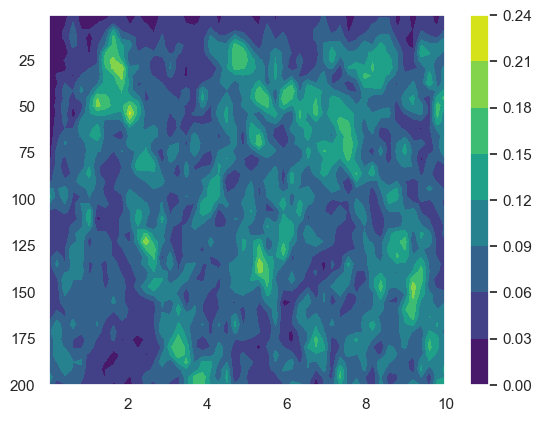

In [257]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

r = np.reshape(df["rec_r"].values, (N, M)).T
z = np.reshape(df["src_z"].values, (N, M)).T

fig = plt.figure()
# ax = fig.add_subplot(projection="3d")
# ax.plot_surface(X=r, Y=z, Z=surf)
plt.contourf(r, z, surf, cmap="viridis")
plt.gca().invert_yaxis()
plt.colorbar()

Text(0, 0.5, 'Depth [m]')

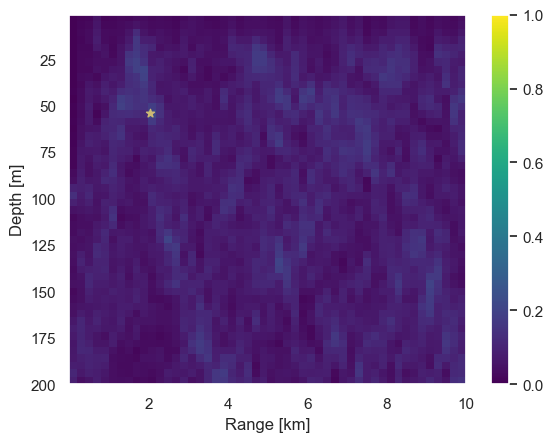

In [258]:
plt.imshow(surf, aspect="auto", origin="lower", cmap="viridis", interpolation="none", vmin=0, vmax=1, extent=[min(rvec), max(rvec), min(zvec), max(zvec)])
plt.colorbar()
plt.scatter(rvec[src_r_ind], zvec[src_z_ind], c="y", marker="*")
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel("Range [km]")
plt.ylabel("Depth [m]")

# Performance

In [56]:
timestep = 230
strategy = "greedy_batch_qei"

results = f"/Users/williamjenkins/Research/Projects/BOGP/Data/localization/experimental/serial_constrained_localization/timestep={timestep}/{strategy}/seed_0292288111/results.json"
client = AxClient.load_from_json_file(results)
print(client.get_trials_data_frame())
print(client.get_best_parameters())
render(client.get_optimization_trace())
render(client.get_contour_plot())

({'rec_r': 2.596457656024347, 'src_z': 67.59891484785459}, ({'bartlett': 0.742398550060562}, {'bartlett': {'bartlett': 9.510619868672074e-09}}))
